<div style="font-size:16pt" font-weight="bold">Introduction to Linear regression</div><br>
Linear regression is a model to fit a Linear relationship (function) between the observed response variable $y_n$ and corresponding independent variables $x_n$. Because we might have many observations for $y$ and $x$ pairs, they can be denoted by subscript $_n$. $y_n$ is a particular variable we are interested in and $x_n$ is the explanatory variables used to explain the $y_n$. For example, in the context of finance, $y_n$ could be returns of stock index, property prices, or credit ratings. The corresponding explanatory variables $x_n$ might be underlying macro economic data, numerical characteristics of the assets or financial ratios of companies. The Capital Asset Pricing Model (CAPM) as well as Arbitrage Pricing Theory (APT) are very important application of Linear regression in finance. APT is a multiple Linear regression.
In multiple Linear regression, $x_n$ can be a matrix of variables $X_n$: <br><br>
$$
\hat{y_n} = X_n \theta = \theta_0 + \theta_1 x_{n,1} + \theta_2 x_{n,2} + \dots \theta_m x_{n,m}
$$.<br><br>
There are several ways to estimate the unknown parameters $\theta$. The most common way is to estimate them by minimizing the mean sqared error (MSE) of $\hat{y}$ and $y$.<br><br> 
$$
MSE = \frac1N\sum_{n=1}^N (y_n - \hat{y_n})^2 = \frac1N\sum_{n=1}^N (\hat{y_n}- y_n)^2 = \frac1N\sum_{n=1}^N (mx_n + b - y_n)^2
$$<br>
The MSE can be minimized by taking the partical derivative of MSE which results in normal equaions. It can also be solved by   𝑄𝑅  factorization which is more numercial stable than normal equations or by gradient descent. The parameter value at the lowest MSE is the optimal parameters.

Application of Linear regression is not limited to predict $y_n$ from $x_n$. It can also be used to causal inference. In causal analysis, Linear regression can find the key factors among many explanatory variables which drive the target dependent variable by hypothesis testing. In multiple Linear regression, hypothesis testing can be applied to each parameter. In finance, finding the true causal macro economic factors by causal inference is a very important application of Linear regression.<br><br>
Time series analysis is also a Linear regression. In time series analysis, explanatory variables include lag values of target dependent variable (Auto regressive model). In Finance, it is used to uncover the functional relationship between the present value of an asset and its own past value. The analysis can also be extended to other independent factors with time lags. Time series analysis is broadly applied in finance.

<hr>

<div style="font-size:14pt" font-weight="bold">Derivation of Normal equation</div><br>

Linear regression can be solved by a closed-form solution called Normal equation. Normal equation can be derived from MSE. If there is N observation in total, independent vairable x and the response variable y can be written as N x 1 column vectors. A column of ones is added to X to take into account the intercept:<br><br>

$$y = 
\begin{bmatrix}
y_1
\\ y_2
\\ y_3
\\  .
\\  .
\\ y_N
\end{bmatrix}
, \: \:
X = 
\begin{bmatrix}
x_1 \:\: 1 
\\  x_2 \:\: 1
\\  x_3 \:\: 1
\\  .
\\  .
\\ x_N \:\: 1
\end{bmatrix}$$

<br><br>
Unknown parameters m (coefficient) and b (intercept) can be stored in a 2 x 1 column vector and coule be called as $\theta$:<br><br>

$$\theta = 
\begin{bmatrix}
m
\\b
\end{bmatrix}$$

<br><br>
The linear system $mx_n +b = y_n$ or $b + mx_n = y_n$can be written as follows:
<br><br>

$$\begin{bmatrix}
x_1 \:\: 1
\\ x_2 \:\: 1
\\ x_3 \:\: 1
\\  .
\\  .
\\ x_N \:\: 1
\end{bmatrix}
\begin{bmatrix}
m
\\b
\end{bmatrix}
\: \: 
= 
\: \: 
\begin{bmatrix}
y_1
\\ y_2
\\ y_3
\\  .
\\  .
\\ y_N
\end{bmatrix}
\: \: 
\Leftrightarrow
\: \: 
X \theta = y
\tag{2.1}$$
<br>
The normal equation $A^TA x = A^T b$ of this system can be derived from the MSE of this problem. :<br><br> 

$$
MSE = \frac1N\sum_{n=1}^N (\hat{y_n}- y_n)^2 = \frac1N\sum_{n=1}^N (mx_n + b - y_n)^2
$$
<br><br>
By the formula 2.1,
$X \theta = y$, where $\theta = \begin{bmatrix}
    m
    \\b
    \end{bmatrix}
$. We can rewrite the MSE to a matrix form as follows:<br><br> 

$$MSE =  \frac1N(X\theta - y)^T(X\theta - y) $$
<br><br>$$= \frac1N(X\theta)^T X\theta - (X\theta)^T y - y^T(X\theta) + y^T y$$
<br><br>$$= \frac1N\theta^T X^T X\theta - 2(X\theta)^T y + y^T y$$
<br><br> Our goal is optimize $\theta$ and minimize the MSE. One way to do this is to take the derivative of MSE with respcet to $\theta$ and set it to zero:
<br><br>$$\frac{\partial MSE}{\partial \theta} = 2X^T X \theta - 2 X^Ty = 0 \Leftrightarrow X^TX \theta = X^T y \tag{2.2}$$
<br><br>We derived the normal equation $X^TX \theta = X^T y$ in 2.2. <br>By multiplying $(X^T X)^{-1}$ from the left-hand side of bosth sides, we get the solution to the unkonwn $\theta = \begin{bmatrix}
    m
    \\b
    \end{bmatrix}
$:
<br><br>$$ \theta = (X^TX)^{-1}X^Ty \: \: \Leftrightarrow  \: \: 
    \begin{bmatrix}
    m
    \\b
    \end{bmatrix}
    = (X^TX)^{-1}X^Ty
    $$

<hr>

<div style="font-size:14pt" font-weight="bold">Python code for univariate linear regression as a machinel learning model</div><br>

In [13]:
# improt relevant libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<div style="font-size:12pt" font-weight="bold">1. Generate sythetic data</div><br>
Feature vector x is uniform distributed in the range from 0 to 10. The response variable y is computed by the following univariate formula: <br>
<p style="text-align:center;">$y = 3 + 5x + z, \:\:\:  z \sim \mathcal{N}(0,1)$</p>

In [14]:
np.random.seed(1)

# Create feature vector X which is 10 times uniform distribution between 0 and 1
x = 10*np.random.rand(200) 

# Create a random term which is a standard normal distributon
z = np.random.randn(200)

In [15]:
# Compute the response variable y
y = 3 + 5*x + z

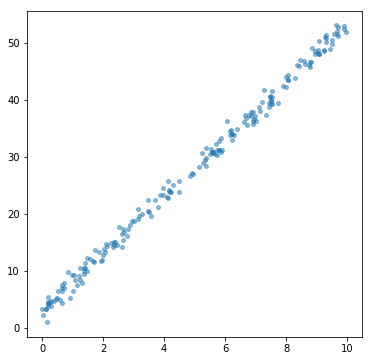

In [16]:
# plot the synthetic data
plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.5, s=15)

<hr>
<div style="font-size:12pt" font-weight="bold">2. Split the data into training data and test data</div><br>
Suppose we do not konw the trure relation between x and y. By looking at the scatter plot, it seems that there is a linear ralation between x and y. We want to implement linear regression to this data and find the parameters. After a model is created, the model have to be evaluted by a test data which is not used in the modeling / training. In the case of a single data set, one way to do this is to split the data into training set and test set.

In [17]:
# Split the data into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

<br>
<div style="font-size:12pt" font-weight="bold">3.1 Solve the MSE by normal equation</div>

In [12]:
b = np.asarray(y_train)
col2 = np.ones(len(x_train))
A = np.vstack((x_train,col2)).T

# Normal equations
A_normal = A
b_normal = b.T

# Solve by normal equaion
m, b = np.linalg.inv(A_normal.T@A_normal)@(A_normal.T@b_normal)

# Print the computed values of m and b should be compared with the values
print(m, b)

4.987731502329268 3.0500555296066665


The coefficient and the intercept of the model is very close to the true value. The difference comes from the random term z.

<hr>
<div style="font-size:12pt" font-weight="bold">3.2 Fit a linear model to the training data using Sklearn</div><br>
Scikit-learn or sklearn is a very powerful library for machine learning. In the previous step, we use sklearn to divide the dataset into training set and test set. The following four steps show how to fit a model to the training data and how to make prediction on the test data. These four steps are common in every sklearn machine learning model. 
<ol>
    <li>Import a model from sklearn
    <li>Set up a model instance. At this stage, the model is structured but empty. No data are feeded into.
    <li>Fit the model to the training data by .fit method. The model learn the data and find the parameters.
    <li>predict $\hat{y}$ from the test set
</ol>
<br>
Reference: https://scikit-learn.org/stable/

In [13]:
# Step1: import linear model from sklearn
from sklearn import linear_model

In [14]:
# check the shape of X_train
# 70% of the data are in the training set
x_train.shape

(140,)

In [15]:
# To feed into sklearn model, we need to convert the 1D feature array into 2D (preprocessing)
x_train = x_train[:,np.newaxis]
x_train.shape

(140, 1)

In [16]:
# Step2: set up a model instance
# fit_intercept=True is necessary to model a linar model with an intercept 
model = linear_model.LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Step3: fit the model to the training data by fit method
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# coefficient of the linear model
model.coef_

array([4.9877315])

In [19]:
# intercept of the linear model
model.intercept_

3.0500555296066665

The coefficient and the intercept of the model is very close to the true value. The difference comes from the random term z.<br>We can predict $\hat{y}$ from the untrained test data

In [20]:
# Step4: predict Y hat from the test set
# To feed into sklearn model, we need to convert the 1D feature array into 2D (preprocessing)
x_test = x_test[:,np.newaxis]

# predict
y_pred = model.predict(x_test)

In [21]:
# prediction results
y_pred

array([10.05217909, 18.8792404 , 49.40788923,  3.19321974, 16.26353176,
       40.59548142,  7.65565671, 14.30783132, 13.2475848 , 31.38538123,
       23.70205647, 29.92550227, 34.458674  , 15.63538618, 47.1069917 ,
       20.28569677, 29.64290841, 32.26615524, 44.67894309, 22.88510841,
        6.36871657,  8.41157407, 25.38978203, 45.28760243,  8.15422207,
       15.33040251, 21.50886165, 43.18905242,  4.46190715,  8.19869158,
       23.86409862,  5.711636  ,  6.63993935,  9.89001851, 18.682812  ,
       49.17699401, 16.97498784, 10.36984533, 20.45216804,  3.83917664,
       42.98346356, 36.15835016,  7.29183245, 37.80547448, 33.2921411 ,
       23.70820543, 22.83975183, 11.29747891, 38.53900006,  9.1023413 ,
        9.90692466, 45.94594045, 16.03387371, 31.66364801,  3.67631411,
       46.76199336,  7.95533154, 15.01301777, 52.37179158, 31.6855002 ])

In [22]:
# corresponding true values
y_test

array([10.51455825, 19.52270062, 51.4093905 ,  2.28219999, 15.41988045,
       40.39983575,  5.18209197, 14.77780349, 13.24002189, 30.44959783,
       22.81224381, 31.48491233, 33.78003484, 17.68207055, 46.61953039,
       22.465016  , 29.33846265, 30.84708755, 46.02450948, 24.50079145,
        7.48211195,  8.31788197, 25.76416903, 46.96428916,  6.46600018,
       14.57728178, 22.4603316 , 44.36005651,  4.69182371,  9.3216389 ,
       24.11403928,  6.49213287,  7.01601599, 10.44244948, 20.86190864,
       48.62236167, 16.09139673, 10.02767777, 20.24152265,  0.99797714,
       42.24972195, 37.30411524,  9.78053628, 37.23390968, 36.3473302 ,
       25.66504238, 23.27973816, 11.77045074, 38.71028613,  9.14809989,
        9.43877852, 46.83740215, 16.45392128, 30.28735391,  3.33043713,
       46.17254093,  9.2487988 , 15.00574063, 53.00581554, 31.14357484])

<hr>
<div style="font-size:12pt" font-weight="bold">3.3 Evaluate the prediction</div><br>


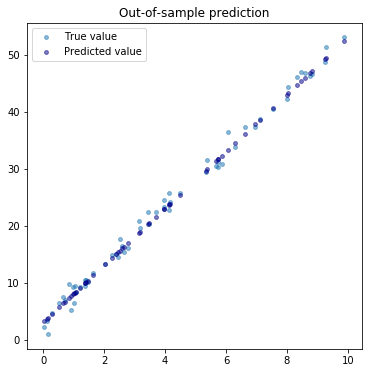

In [23]:
# plot the predicted value and the corresponding true value
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test, label= "True value", alpha=0.5, s=15)
plt.scatter(x_test,y_pred, c= "darkblue", label= "Predicted value", alpha=0.5, s=15)
plt.title("Out-of-sample prediction")
plt.legend()

<hr>

MSE is the loss function of linear regresson. A model with a lower MSE on the test set is a better model than the higher one.<br><br>
The MSE formula:
$$
MSE = \frac1N\sum_{n=1}^N (y_n - \hat{y_n})^2
$$

In [24]:
# Compute the MSE of the predicted values and the true value (The value of the loss function)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.4519483616955557

In [44]:
# Suppose we have an inaccurate parameter estimates which results in a higher MSE
y_poor = 6 + 4*x_test

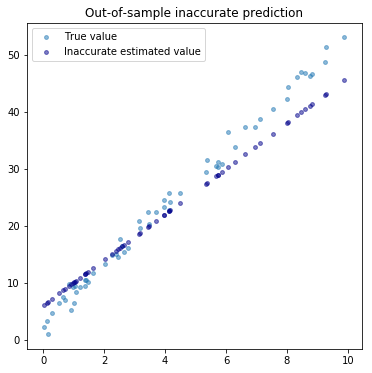

In [45]:
# plot the inaccurate predicted value and the corresponding true value
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test, label= "True value", alpha=0.5, s=15)
plt.scatter(x_test,y_poor, c= "darkblue", label= "Inaccurate estimated value", alpha=0.5, s=15)
plt.title("Out-of-sample inaccurate prediction")
plt.legend()

In [48]:
# MSE of the inaccurate estimate
mean_squared_error(y_test, y_poor)

11.933696934834895

The MSE of the inaccurate estimate is 11.93 which is higher than 1.45, the MSE of fitted model. 

<hr>

$\textrm{R}^2$ is the proportion of the variance in the response variable that can be explained by the feature variable. Note that this is not a loss function.<br>
Compute coefficient of determination $\textrm{R}^2$:

$$
\textrm{R}^2 = 1 - \frac{\sum_{n=1}^{N} (y_n - \hat{y_n})^{2}}{ \sum_{n=1}^{N} (y_n - \bar{y_n})^{2} } = 1 - \frac{\textrm{SS}_{res} \textrm{ : residual sum of squares}}{\textrm{SS}_{tot} \textrm{ : total sum of squares}}
$$


In [65]:
# Compute the R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9932025177396482

<hr>
<br>
<div style="font-size:12pt" font-weight="bold">4 Fit a linear model to the training data using gradient descent</div><br>
Linear model can also be solved by gradient descent algorithm. Gradient descent can be implemented by pytorch or keras-tensorflow among others. In the follwoing code, we use keras.
<br><br>
Reference: https://keras.io/

In [53]:
# import tensorflow. 
# Keras is a high level language of tensorflow and is included in the tensorflow library
import tensorflow as tf

In [66]:
# Create the data again
# Kerans can handle one-demensionla data. We do note have to add an extra dimension as in the case of sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

Keras has two phases in its modeling.<br>
The first stage is construction phase. In the construction phase, a model is defined but no data are feeded into it.

In [78]:
# Construction phase

# clear any exiting model
tf.keras.backend.clear_session()

# initiate a sequential model
model = tf.keras.Sequential()

# add one linear layer. In this case, the input and output dimension is one 
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

# define the loss function and the optimizer
# sgd is stochastic gradient descent
model.compile(loss="mean_squared_error", optimizer='sgd')

In [79]:
# see the structure of the model
# the model has signle linear layer with two parameters, intercept and coefficient
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


The second phase is the execution phase where data are feeded into and the model estimates the parameters from the training data.

In [73]:
# Execution phase

# fit the model to the data
# An epoch is one complete pass through the training data. 
# We set it to 100 which means the model will go throuhg the data 100 times.
model.fit(x_train,y_train,epochs=100)

Train on 140 samples
Epoch 1/100
140/140 [==============================] - 0s 3ms/sample - loss: 161.1075
Epoch 2/100
140/140 [==============================] - 0s 184us/sample - loss: 2.4048
Epoch 3/100
140/140 [==============================] - 0s 96us/sample - loss: 2.3167
Epoch 4/100
140/140 [==============================] - 0s 215us/sample - loss: 2.2633
Epoch 5/100
140/140 [==============================] - 0s 159us/sample - loss: 2.1977
Epoch 6/100
140/140 [==============================] - 0s 256us/sample - loss: 2.1230
Epoch 7/100
140/140 [==============================] - 0s 141us/sample - loss: 2.0629
Epoch 8/100
140/140 [==============================] - 0s 158us/sample - loss: 2.0093
Epoch 9/100
140/140 [==============================] - 0s 184us/sample - loss: 1.9965
Epoch 10/100
140/140 [==============================] - 0s 230us/sample - loss: 1.8782
Epoch 11/100
140/140 [==============================] - 0s 345us/sample - loss: 1.8514
Epoch 12/100
140/140 [==========

140/140 [==============================] - 0s 240us/sample - loss: 0.9477
Epoch 96/100
140/140 [==============================] - 0s 190us/sample - loss: 0.9137
Epoch 97/100
140/140 [==============================] - 0s 124us/sample - loss: 0.9422
Epoch 98/100
140/140 [==============================] - 0s 146us/sample - loss: 0.9206
Epoch 99/100
140/140 [==============================] - 0s 330us/sample - loss: 0.9488
Epoch 100/100
140/140 [==============================] - 0s 273us/sample - loss: 0.9091


<hr>
The training is over. We can use our model to predecit responses from untrained data.

In [74]:
# see the trained parameters
model.get_weights()

[array([[5.0147185]], dtype=float32), array([2.8453333], dtype=float32)]

The trained parameters are pretty close to the true parameters

In [75]:
# predict y hat
y_pred = model.predict(x_test)

In [76]:
# Compute the MSE of the predicted values and the true value (The value of the loss function)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.4935925690315683

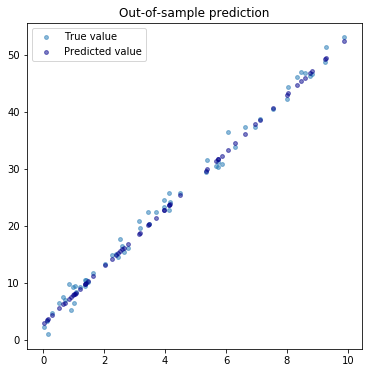

In [77]:
# plot the predicted value and the corresponding true value
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test, label= "True value", alpha=0.5, s=15)
plt.scatter(x_test,y_pred, c= "darkblue", label= "Predicted value", alpha=0.5, s=15)
plt.title("Out-of-sample prediction")
plt.legend()

In [ ]:
# terminate the kernel and free memory resources
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

<hr>